In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [ ]:
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
930248,2021-01-14,Sweetwater,Wyoming,56037.0,3250,26.0
930249,2021-01-14,Teton,Wyoming,56039.0,2579,4.0
930250,2021-01-14,Uinta,Wyoming,56041.0,1794,9.0
930251,2021-01-14,Washakie,Wyoming,56043.0,836,23.0


In [ ]:
#Checking data type
df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [ ]:
#Total number of rows and columns
df.shape

(930253, 6)

In [ ]:
#Checking for duplicate data
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ",duplicate_rows_df.shape)

Number of duplicate rows:  (0, 6)


In [ ]:
df.count()

date      930253
county    930253
state     930253
fips      921562
cases     930253
deaths    910400
dtype: int64

In [ ]:
#Checking for null values and droping those that are errors
print(df.isnull().sum())

date          0
county        0
state         0
fips       8691
cases         0
deaths    19853
dtype: int64


In [ ]:
# To know all the columns
df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [ ]:
# To drop irrelevant columns fo my analysis
df = df.drop(['fips'],axis=1)

In [ ]:
#Checking if the column was dropped
df

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
930248,2021-01-14,Sweetwater,Wyoming,3250,26.0
930249,2021-01-14,Teton,Wyoming,2579,4.0
930250,2021-01-14,Uinta,Wyoming,1794,9.0
930251,2021-01-14,Washakie,Wyoming,836,23.0


In [ ]:
df.describe()

,cases,deaths
count,930253.000000,910400.000000
mean,2184.935301,56.622094
std,11426.796033,459.918372
min,0.000000,0.000000
25%,40.000000,0.000000
50%,260.000000,4.000000
75%,1123.000000,24.000000
max,975693.000000,25834.000000


In [ ]:
# This variable will tell me the number of death and cases only for New York
df1 = df[~df['state'].isin(['Guam','District of Columbia','California','Texas','Florida','Pennsylvania','Georgia','Alaska','Arizona','Michigan','Washington','Nevada','Hawaii','Massachusetts','Ohio','Wisconsin','Alabama','Colorado','North Carolina','Indiana','Illinois','New Jersey','Minnesota','Virginia','Montana','Oregon','Maine','Delaware','Maryland','Utah','Missouri','Tennessee','Kentucky','Louisiana','Connecticut','Wyoming','South Carolina','Nebraska','Mississippi','Kansas','Arkansas','New Mexico','Iowa','Idaho','Vermont','North Dakota','Rhode Island','New Hampshire','West Virginia','South Dakota','Oklahoma','Puerto Rico','Northern Mariana Islands','Virgin Islands'])]

In [ ]:
df1

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0.0
448,2020-03-02,New York City,New York,1,0.0
482,2020-03-03,New York City,New York,2,0.0
518,2020-03-04,New York City,New York,2,0.0
519,2020-03-04,Westchester,New York,9,0.0
...,...,...,...,...,...
928906,2021-01-14,Washington,New York,1332,20.0
928907,2021-01-14,Wayne,New York,3448,50.0
928908,2021-01-14,Westchester,New York,80868,1763.0
928909,2021-01-14,Wyoming,New York,1939,40.0


In [ ]:
# This variable will tell me the number of death and cases only for New York between 2020-12-15 and 2021-01-14
df2 = df1[(df1['date']>'2020-12-14')]

In [ ]:
df2

,date,county,state,cases,deaths
831494,2020-12-15,Albany,New York,8214,173.0
831495,2020-12-15,Allegany,New York,1427,65.0
831496,2020-12-15,Broome,New York,6601,178.0
831497,2020-12-15,Cattaraugus,New York,1817,29.0
831498,2020-12-15,Cayuga,New York,1629,14.0
...,...,...,...,...,...
928906,2021-01-14,Washington,New York,1332,20.0
928907,2021-01-14,Wayne,New York,3448,50.0
928908,2021-01-14,Westchester,New York,80868,1763.0
928909,2021-01-14,Wyoming,New York,1939,40.0


In [ ]:
#I needed to create a more specific table to create meaningful charts, so df3 will give me the deaths and cases only for NYC
New_York = df2.groupby(['county'])
New_York.get_group('New York City')
df3 = New_York.get_group('New York City')

In [ ]:
df3

,date,county,state,cases,deaths
831522,2020-12-15,New York City,New York,367198,24561.0
834768,2020-12-16,New York City,New York,370109,24578.0
838014,2020-12-17,New York City,New York,373320,24613.0
841259,2020-12-18,New York City,New York,377728,24652.0
844505,2020-12-19,New York City,New York,381067,24677.0
847750,2020-12-20,New York City,New York,383808,24697.0
850995,2020-12-21,New York City,New York,387595,24735.0
854240,2020-12-22,New York City,New York,391634,24768.0
857485,2020-12-23,New York City,New York,395810,24790.0
860730,2020-12-24,New York City,New York,401251,24842.0


In [ ]:
#I needed to create a new variable called Days to use it as my x in my chart and compare that with the number of deaths and cases
df3['Days'] = 0
for i in range(0,31):
  df3.iloc[i,5] = i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df3

,date,county,state,cases,deaths,Days
831522,2020-12-15,New York City,New York,367198,24561.0,0
834768,2020-12-16,New York City,New York,370109,24578.0,1
838014,2020-12-17,New York City,New York,373320,24613.0,2
841259,2020-12-18,New York City,New York,377728,24652.0,3
844505,2020-12-19,New York City,New York,381067,24677.0,4
847750,2020-12-20,New York City,New York,383808,24697.0,5
850995,2020-12-21,New York City,New York,387595,24735.0,6
854240,2020-12-22,New York City,New York,391634,24768.0,7
857485,2020-12-23,New York City,New York,395810,24790.0,8
860730,2020-12-24,New York City,New York,401251,24842.0,9


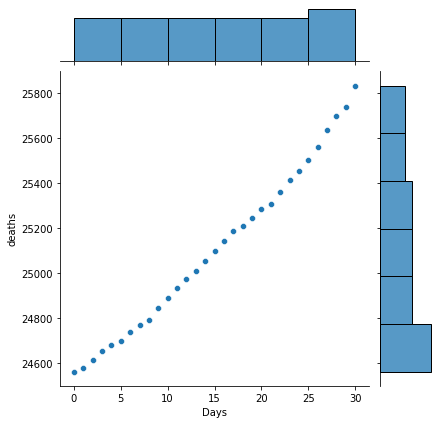

In [ ]:
#This tells me the number of death each day
sns.jointplot(x='Days',y='deaths',data=df3)

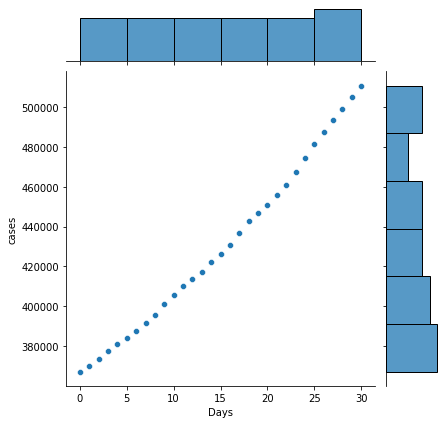

In [ ]:
##This tells me the number of cases each day
sns.jointplot(x='Days',y='cases',data=df3)

In [ ]:
#This will give me the number of cases till 2021-1-14
df.groupby(['state'])['cases'].max()

state
Alabama                      60842
Alaska                       24319
Arizona                     406226
Arkansas                     29421
California                  975693
Colorado                     52624
Connecticut                  65226
Delaware                     38955
District of Columbia         32820
Florida                     336748
Georgia                      69784
Guam                          8426
Hawaii                       19727
Idaho                        41702
Illinois                    426658
Indiana                      80078
Iowa                         44945
Kansas                       45337
Kentucky                     59780
Louisiana                    36677
Maine                         9436
Maryland                     61558
Massachusetts                89999
Michigan                     91526
Minnesota                    91859
Mississippi                  16717
Missouri                     77057
Montana                      14617
Nebraska      

In [ ]:
##This will give me the number deaths still 2021-1-14
df.groupby(['state'])['deaths'].max()

state
Alabama                       887.0
Alaska                        127.0
Arizona                      6233.0
Arkansas                      444.0
California                  13234.0
Colorado                      715.0
Connecticut                  1981.0
Delaware                      496.0
District of Columbia          842.0
Florida                      4500.0
Georgia                       843.0
Guam                          125.0
Hawaii                        249.0
Idaho                         387.0
Illinois                     8889.0
Indiana                      1345.0
Iowa                          440.0
Kansas                        626.0
Kentucky                      732.0
Louisiana                     715.0
Maine                         117.0
Maryland                     1211.0
Massachusetts                2910.0
Michigan                     3835.0
Minnesota                    1461.0
Mississippi                   310.0
Missouri                     1547.0
Montana               

In [ ]:
df4 = df[~df['state'].isin(['Guam','District of Columbia','Pennsylvania','Georgia','Alaska','Arizona','Michigan','Washington','Nevada','Hawaii','Massachusetts','Ohio','Wisconsin','Alabama','Colorado','North Carolina','Indiana','Illinois','New Jersey','Minnesota','Virginia','Montana','Oregon','Maine','Delaware','Maryland','Utah','Missouri','Tennessee','Kentucky','Louisiana','Connecticut','Wyoming','South Carolina','Nebraska','Mississippi','Kansas','Arkansas','New Mexico','Iowa','Idaho','Vermont','North Dakota','Rhode Island','New Hampshire','West Virginia','South Dakota','Oklahoma','Puerto Rico','Northern Mariana Islands','Virgin Islands'])]

In [ ]:
df4

,date,county,state,cases,deaths
5,2020-01-25,Orange,California,1,0.0
9,2020-01-26,Los Angeles,California,1,0.0
10,2020-01-26,Orange,California,1,0.0
14,2020-01-27,Los Angeles,California,1,0.0
15,2020-01-27,Orange,California,1,0.0
...,...,...,...,...,...
929878,2021-01-14,Wood,Texas,2388,83.0
929879,2021-01-14,Yoakum,Texas,801,23.0
929880,2021-01-14,Young,Texas,1637,31.0
929881,2021-01-14,Zapata,Texas,1270,18.0


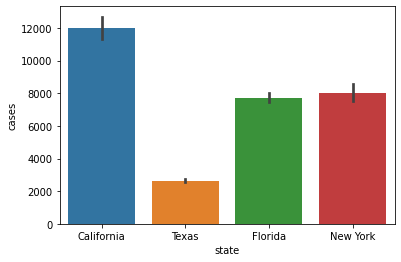

In [ ]:
sns.barplot(x='state',y='cases',data=df4)

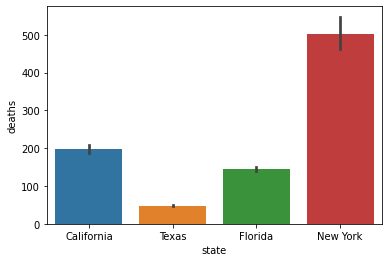

In [ ]:
sns.barplot(x='state',y='deaths',data=df4)

In [ ]:
##From the analysis of these data, I have concluded that in New york City the cases and deaths due to Covid-19 have been increasing in the last 30 days.
##From the analysis of these data, I have also concluded that the highest number of cases among California,Texas,Florida and New York occurred in California, but the hishest number of deaths ocurred in New York